In [0]:
%load README.md

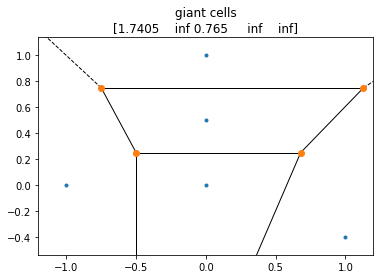

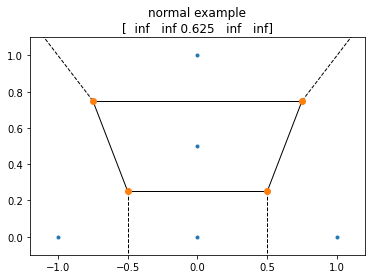

[0.9346256  1.20632349 2.06449383]
1.2063234911923724
[0.0653744  0.20632349 1.06449383]
argmin: 0
num of giant cells: 4
vol sum before: 5.865519803249663
vol sum after: 0.934625599877338


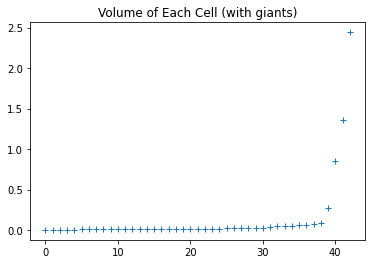

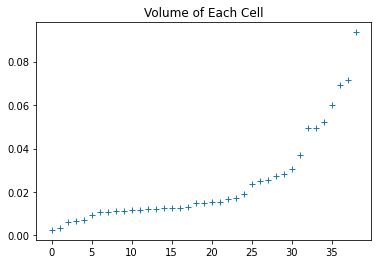

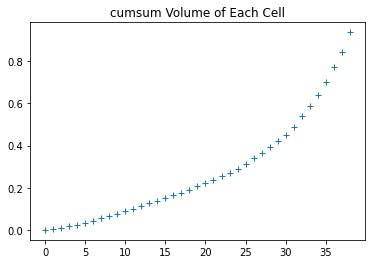

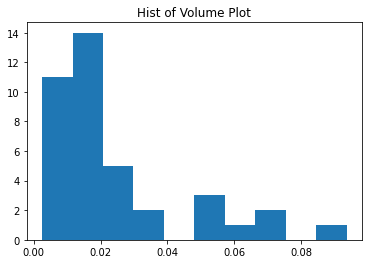

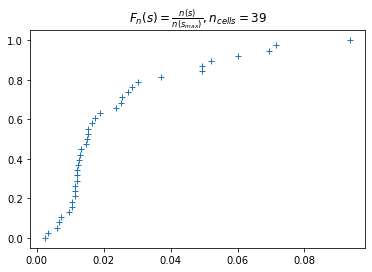

In [6]:
%run Crystal-Simulation.py

[0.99999598 1.00006006 1.00012486]
1.000060057428897
[4.01638486e-06 6.00574289e-05 1.24858977e-04]
argmin: 0
num of giant cells: 528
vol sum before: 6000.513988761228
vol sum after: 0.9999959836151272


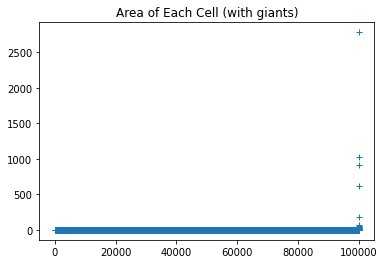

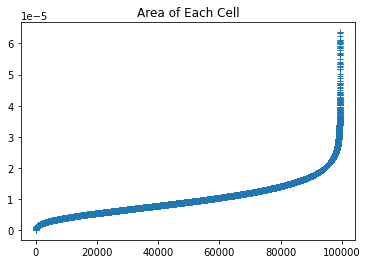

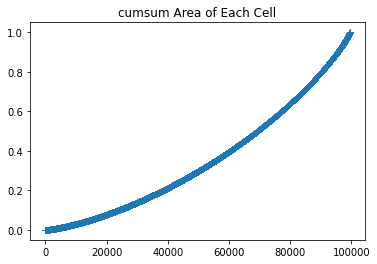

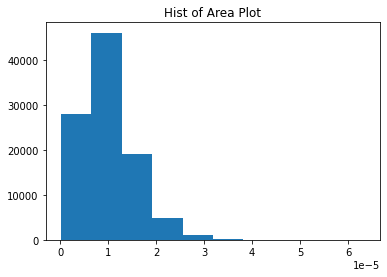

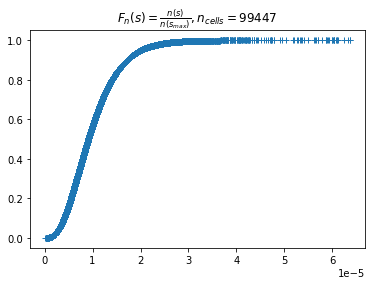

In [3]:

# filter out inf cells
v_no_inf = volumes_[volumes_ != np.inf]

cum_no_inf = np.cumsum(v_no_inf)

num_biggr = np.count_nonzero(cum_no_inf > 1)

# want sum(volumes) close to 1
# look around above/below 1, choose whichever closer
crit_pts = cum_no_inf[-num_biggr - 1:-num_biggr + 2]

# if False:  # for num_pts=15
try:
    np.argmin(abs(crit_pts - 1))
except ValueError as e:
    print(e)  # not many giants
    crit_pts = cum_no_inf[-num_biggr - 1:]

print(crit_pts,
      cum_no_inf[-num_biggr],
      abs(crit_pts - 1),
      'argmin: {}'.format(np.argmin(abs(crit_pts - 1))),
      'num of giant cells: {}'.format(num_biggr),
      sep='\n')

# ab1 means above/below 1
ab1 = np.argmin(abs(crit_pts - 1))
# volumes = v_no_inf[:-num_biggr + ab1]
# if False:
volumes = v_no_inf if len(v_no_inf[:-num_biggr + ab1]) == 0 else v_no_inf[:-num_biggr + ab1]

print('vol sum before:', np.sum(v_no_inf))
print('vol sum after:', np.sum(volumes))

# if False:
plt.title('Volume of Each Cell (with giants)')
plt.plot(volumes_, '+')
plt.show()

plt.title('Volume of Each Cell')
plt.plot(volumes, '+')
plt.show()

plt.title('cumsum Volume of Each Cell')
plt.plot(np.cumsum(volumes), '+')
plt.show()

plt.title('Hist of Volume Plot')
plt.hist(volumes)
plt.show()

plt.title(r'$F_n(s)=\frac{{n(s)}}{{n(s_{{max}})}},n_{{cells}}={}$'.format(len(volumes)))
plt.plot(volumes, np.linspace(0, 1, len(volumes)), '+')
plt.show()
